**The purpose of this lab is to build the best classifier in the security area based on Internet Firewall DataSet with the helping frameworks & libraries.**

After completing this lab you will

Be able to explore the Internet Firewall DataSet and build the best classifier via selecting from a set of existed classifiers.
Be able to show different calculated metrics of existed classifiers.
Be able to visualize the data analysis results with various plot types.

The data that we are going to use for this is a subset of an open source default of Internet Firewall DataSet from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

This dataset is public available for research. The details are described in [Fatih Ertam, fatih.ertam '@' firat.edu.tr, Firat University, Turkey].

**Please include this citation if you plan to use this database: F. Ertam and M. Kaya, Classification of firewall log files with multiclass support vector machine, in 6th International Symposium on Digital Forensic and Security, ISDFS 2018 - Proceeding, 2018.**

During the work, you will know about the classification task is the main machine learning task solved by an algorithm correlating some input data with one or more classes, which must be defined earlier. In essence, classification can be used as a tool for many other tasks, such as automatic language detection, 3D-reconstruction, etc.

Moreover, you will be provided 11 well-known classifiers. You should select a better classifier among them. Some of them need enough more time for learning by .fit method, so you can select not all classifiers, but, for instance, 5 or 6 will be enough.

Classification refers to a supervised learning strategy, also called supervised or guided learning.

A classification task is often referred to as predicting a categorical dependent variable (i.e. a dependent variable that is a category) based on a sample of continuous and / or categorical variables.

In addition, we will build the visualization of our results, exactly the obtained metrics (accuracy and loss) to choose a better classifier.

**Import required libraries and dataset**

**Download data using a URL and rename it.**

In [25]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00542/log2.csv"
response = requests.get(url)

with open("log2.csv", "wb") as file:
    file.write(response.content)



In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scikitplot as sk
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn import *
import time

%matplotlib inline
sns.set(style = "darkgrid")
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')
seed = 42

import warnings
warnings.filterwarnings(action = "ignore", category = FutureWarning)

As well as specify the value of the precision parameter equal to 3 to display three decimal signs (instead 6 as default).

**Explore the Dataset**

In this section you will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The count of the output rows from the dataset is determined by the head method parameter.

In [2]:


import pandas as pd

# Set float formatting globally
pd.options.display.float_format = '{:.3f}'.format

# Example DataFrame
df = pd.DataFrame({'A': [1.12345, 2.34567], 'B': [3.14159, 4.98765]})

print(df)


      A     B
0 1.123 3.142
1 2.346 4.988


In [27]:
df = pd.read_csv('log2.csv', header = 0)
df.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


**Let's look at the dataset size, feature names and their types**

In [28]:
df.shape

(65532, 12)

The dataset contains `65 532` objects (rows), for each of which `12` features are set (columns), including 1 target feature (`Action`).

In [29]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

Input features (column names):

Source Port - a port, from which data transfer has been carried out

Destination Port - a port, to which data transfer has been carried out

NAT Source Port - a port, which needs to track for outgoing traffic from NAT (Network Address Translation) side to retransfer transit packets

NAT Destination Port - a port, which needs to track for incoming traffic from NAT (Network Address Translation) side to retransfer transit packets

Action - a feature (desired target), which is used as a class, 4 classes in total (allow, deny, drop, and reset-both)

Bytes - bytes total, is equal to the sum of the next two columns

Bytes Sent - the amount of data sent in bytes

Bytes Received - the amount of data received in bytes

Packets – packets total, is equal to the sum of the last two columns

Elapsed Time (sec) - time taken to transfer data in seconds

pkts_sent - the amount of data sent in packets

pkts_received - the amount of data received in packets

To see general information on the all dataframe features (columns), we use the info method:

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Source Port,65532.0,49391.969343,1.525571e+04,0.0,49183.0,53776.5,58638.00,6.553400e+04
Destination Port,65532.0,10577.385812,1.846603e+04,0.0,80.0,445.0,15000.00,6.553500e+04
NAT Source Port,65532.0,19282.972761,2.197069e+04,0.0,0.0,8820.5,38366.25,6.553500e+04
NAT Destination Port,65532.0,2671.049930,9.739162e+03,0.0,0.0,53.0,443.00,6.553500e+04
Bytes,65532.0,97123.950085,5.618439e+06,60.0,66.0,168.0,752.25,1.269359e+09
Bytes Sent,65532.0,22385.796908,3.828139e+06,60.0,66.0,90.0,210.00,9.484772e+08
Bytes Received,65532.0,74738.153177,2.463208e+06,0.0,0.0,79.0,449.00,3.208818e+08
Packets,65532.0,102.866035,5.133002e+03,1.0,1.0,2.0,6.00,1.036116e+06
Elapsed Time (sec),65532.0,65.833577,3.024618e+02,0.0,0.0,15.0,30.00,1.082400e+04
pkts_sent,65532.0,41.399530,3.218871e+03,1.0,1.0,1.0,3.00,7.475200e+05


In [37]:
[df[i].unique() for i in df if df[i].dtypes == "object"]

[array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)]

In [38]:
df.columns = df.columns.str.lower().str.replace(" ","_")
df.head(7)

,source_port,destination_port,nat_source_port,nat_destination_port,action,bytes,bytes_sent,bytes_received,packets,elapsed_time_(sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
5,51465,443,39975,443,allow,3961,1595,2366,21,16,12,9
6,60513,47094,45469,47094,allow,320,140,180,6,7,3,3


In [39]:
Counter(df.action)

Counter({'allow': 37640, 'deny': 14987, 'drop': 12851, 'reset-both': 54})

In [44]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

# Encode the target feature
lab = preprocessing.LabelEncoder()
df['action'] = lab.fit_transform(df['action'])

# Create a new dataframe without the target feature
data_out = df.drop("action", axis=1)

# Define quantiles, interquartile range, and outlier step using Tukey's method
quant_1 = data_out.quantile(0.25)
quant_3 = data_out.quantile(0.75)
diff = quant_3 - quant_1

# Compute bounds for each column
lower_bound = quant_1 - 1.5 * diff
upper_bound = quant_3 + 1.5 * diff

# Filter out outliers
data = df[~((data_out < lower_bound) | (data_out > upper_bound)).any(axis=1)]


In [48]:
data.shape, Counter(data.action)

((34531, 12), Counter({0: 16649, 2: 12851, 1: 5020, 3: 11}))

In [53]:
fig = sns.countplot(data.action)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), size = 12,
                   textcoords = 'offset points')

In [54]:
feature, target = data.drop("action", axis = 1).values, data["action"].values
sm = SMOTE(random_state = seed)
feature, target = sm.fit_resample(feature, target)

In [55]:
Counter(target)

Counter({0: 16649, 2: 16649, 1: 16649, 3: 16649})

In [56]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(feature, target,
                                                                test_size = 0.3,
                                                                random_state = seed,
                                                                stratify = target,
                                                                shuffle = True)

In [57]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((46617, 11), (19979, 11), (46617,), (19979,))

In [58]:
xtrain = preprocessing.StandardScaler().fit_transform(xtrain)
xtest = preprocessing.StandardScaler().fit_transform(xtest)


**Form a set of classifiers and fit them**

Will describe 11 well-known classifiers with some minimal parameters. Some of them are commented out, so you should uncomment by rows only those, which you want to study. Thus, you can select not all classifiers, but, for instance, 5 or 6 will be enough.

Besides, the approximate execution time is shown at the right in a row with classifier description. If you will obtain the following message "Warning: Variables are collinear", then never mind, because this Lab has not an aim to eliminate this warning.

In [62]:
AUTOTUNE = os.cpu_count()
Classifiers = {
    "Linear_Regressor": linear_model.LogisticRegression(C = 10, solver = 'liblinear'),  ## duration is less than 1 min
    # "SVC": svm.SVC(random_state = seed),  ## duration is about 10 min
    # "Linear_SVC": svm.LinearSVC(max_iter = 10000, random_state = seed),  ## duration is about 4 min
    "Random_Forest": ensemble.RandomForestClassifier(random_state = seed, n_jobs = AUTOTUNE),  ## duration is about 1-2 min
    "Ada_Boost": ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state = seed),
                                             random_state = seed,
                                             learning_rate = 0.1),  ## duration is about 2 min
    # "Gradient_Boost": ensemble.GradientBoostingClassifier(random_state = seed),  ## duration is about 10 min
    "Ex_Tree_Classifier": ensemble.ExtraTreesClassifier(random_state = seed, n_jobs = AUTOTUNE),  ## duration is about 1-2 min
    # "ML_PC": neural_network.MLPClassifier(max_iter = 1000, random_state = seed),  ## duration is about 20 min
    "kNN": neighbors.KNeighborsClassifier(n_jobs = AUTOTUNE),  ## duration is about 2-3 min
#     "QDA": discriminant_analysis.QuadraticDiscriminantAnalysis(reg_param = np.finfo(float).eps),  ## duration is less than 1 min
    "Decision_Tree": tree.DecisionTreeClassifier(random_state = seed)  ## duration is less than 1 min
}

In [61]:
start_time = time.time()
kfold = StratifiedKFold(n_splits = 10)
for name, classifier in Classifiers.items():
    sk.estimators.plot_learning_curve(classifier, xtrain, ytrain,
                                      cv = kfold,
                                      title = name,
                                      random_state = seed,
                                      n_jobs = -1)
print("Elapsed time:", round(time.time() - start_time, 2), 'sec\n')

Elapsed time: 142.57 sec



**Metrics calculation and choice better classifier**

Let's teach our set of classifiers (which you selected earlier) wuth the help of fit method. After each fitting stage, we will calculate some metrics, which helps us to chose the best classifier for the further optimization. We will use the following metrics: train & test accuracy, log_loss, and numbers of correct and incorrect cases of a predict from our models (classifiers).

In [64]:
from sklearn.metrics import log_loss
import pandas as pd
import time
import matplotlib.pyplot as plt

start_time = time.time()
logging_cols = ["Classifier", "Test accuracy", "Train accuracy", "Log_loss", "Correct_cases", "Incorrect_cases"]
logging = pd.DataFrame(columns=logging_cols)

for name_c, classif_c in Classifiers.items():
    classif_c.fit(xtrain, ytrain)
    predict = classif_c.predict(xtest)
    accuracy = classif_c.score(xtest, ytest)
    train_pred = classif_c.predict_proba(xtest)
    lg_ls = log_loss(ytest, train_pred)
    train_test_acc = classif_c.score(xtrain, ytrain)
    correct = (ytest == predict).sum()
    incorrect = (ytest != predict).sum()
    
    print("=" * 45)
    print('****    Estimations    ****')
    print(f"Test accuracy:  {accuracy * 100:.2f}%    Name: {name_c}")
    print(f"Train accuracy:  {train_test_acc * 100:.2f}%")
    print(f"Log_loss:  {lg_ls:.4f}")
    print(f"Correct   points:  {correct}")
    print(f"Incorrect points:  {incorrect}")
    
    # Replace this line with pd.concat
    logging_entry = pd.DataFrame([[name_c, accuracy * 100, train_test_acc * 100, lg_ls, correct, incorrect]], columns=logging_cols)
    logging = pd.concat([logging, logging_entry], ignore_index=True)

print("\nElapsed time:", round(time.time() - start_time, 2), 'sec\n')


****    Estimations    ****
Test accuracy:  90.09%    Name: Linear_Regressor
Train accuracy:  89.61%
Log_loss:  0.2822
Correct   points:  17999
Incorrect points:  1980
****    Estimations    ****
Test accuracy:  74.67%    Name: Random_Forest
Train accuracy:  99.98%
Log_loss:  0.3296
Correct   points:  14919
Incorrect points:  5060
****    Estimations    ****
Test accuracy:  81.08%    Name: Ada_Boost
Train accuracy:  99.98%
Log_loss:  3.9102
Correct   points:  16198
Incorrect points:  3781
****    Estimations    ****
Test accuracy:  99.16%    Name: Ex_Tree_Classifier
Train accuracy:  99.98%
Log_loss:  0.0918
Correct   points:  19811
Incorrect points:  168
****    Estimations    ****
Test accuracy:  99.45%    Name: kNN
Train accuracy:  99.56%
Log_loss:  0.0968
Correct   points:  19869
Incorrect points:  110
****    Estimations    ****
Test accuracy:  73.72%    Name: Decision_Tree
Train accuracy:  99.98%
Log_loss:  9.4714
Correct   points:  14729
Incorrect points:  5250

Elapsed time: 20.

**Visualization of results**

Let's visualize calculated metrics with the same classifiers that to get a chance to choose the best classifier. These visualizations can help us to understand classifiers achievements and compare them more clearly. We will do this for the accuracy metric.

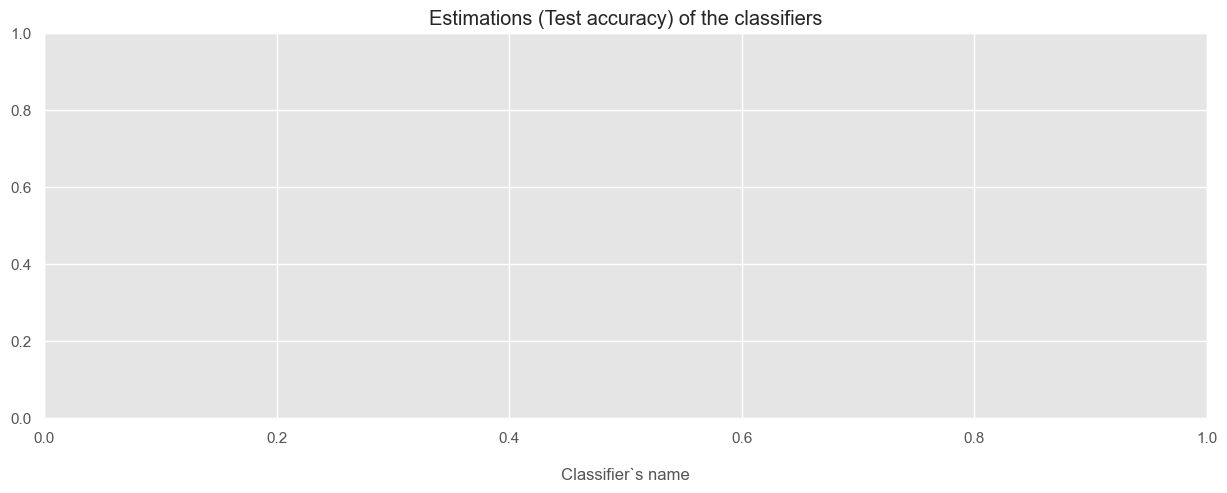

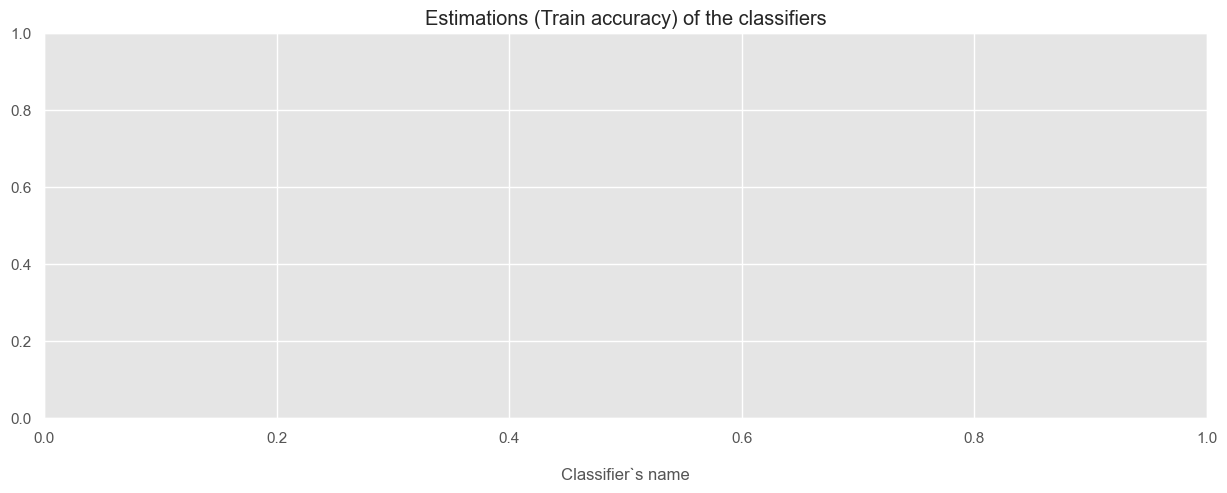

Empty DataFrame
Columns: [Classifier, Test accuracy, Train accuracy, Log_loss, Correct_cases, Incorrect_cases]
Index: []


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure this is initialized from your earlier code
# Replace `logging` with `results_log`
results_log_cols = ["Classifier", "Test accuracy", "Train accuracy", "Log_loss", "Correct_cases", "Incorrect_cases"]
results_log = pd.DataFrame(columns=results_log_cols)

# Visualization for Test Accuracy
sns.set_color_codes("muted")
graph = sns.barplot(
    x='Classifier',
    y='Test accuracy',
    data=results_log,  # Use the correct DataFrame here
    palette='hls'
)

for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12), size=12,
                   textcoords='offset points')

plt.xlabel('\nClassifier`s name')
plt.title('Estimations (Test accuracy) of the classifiers')
plt.show()

# Visualization for Train Accuracy
sns.set_color_codes("muted")
graph = sns.barplot(
    x='Classifier',
    y='Train accuracy',
    data=results_log,  # Use the correct DataFrame here
    palette='hls'
)

for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12), size=12,
                   textcoords='offset points')

plt.xlabel('\nClassifier`s name')
plt.title('Estimations (Train accuracy) of the classifiers')
plt.show()

print(results_log.head())


In [10]:
print(results_log.head())


Empty DataFrame
Columns: [Classifier, Test accuracy, Train accuracy, Log_loss, Correct_cases, Incorrect_cases]
Index: []


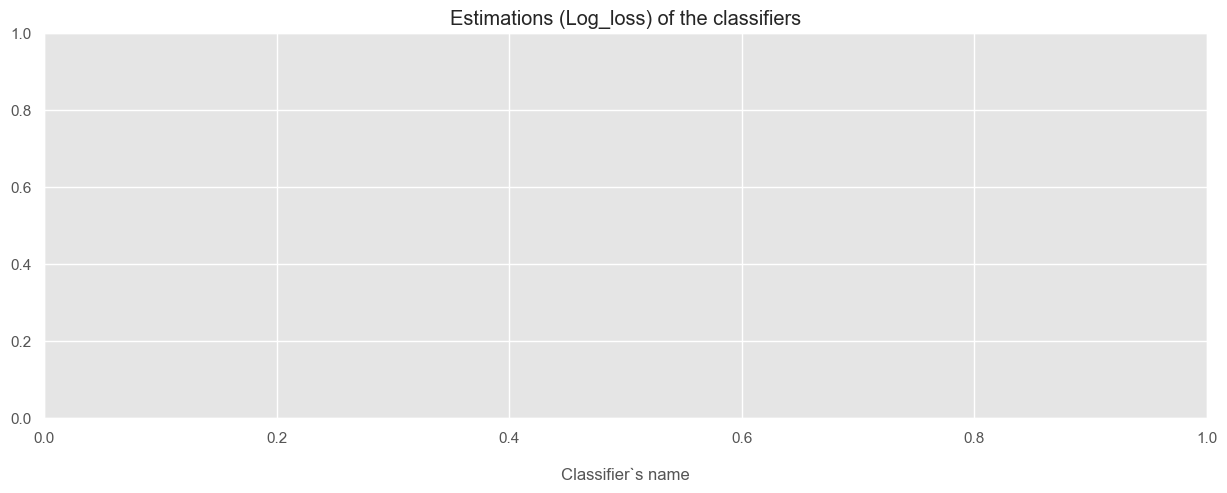

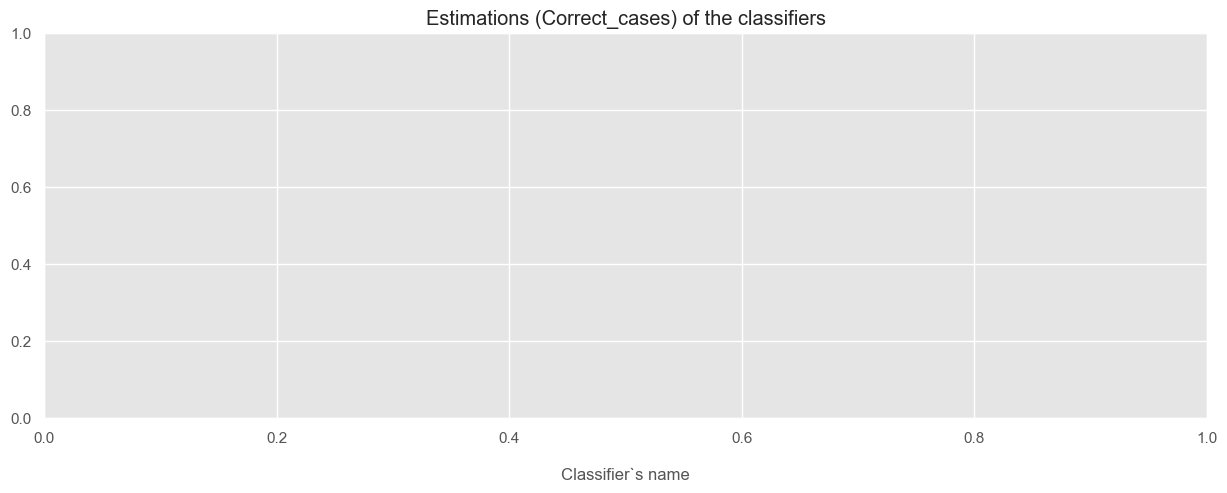

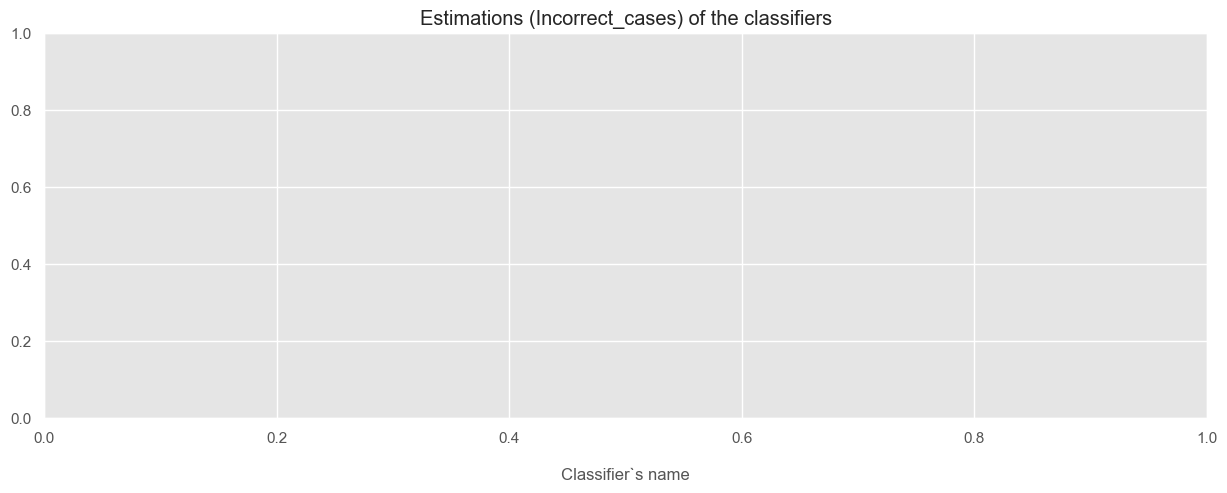

In [11]:
sns.set_color_codes("muted")

# Plot for Log_loss
graph = sns.barplot(x='Classifier',
                    y='Log_loss',
                    data=results_log,  # Use the correct DataFrame name
                    palette='hls')

for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12), size=12,
                   textcoords='offset points')

plt.xlabel('\nClassifier`s name')
plt.title('Estimations (Log_loss) of the classifiers')
plt.show()

# Plot for Correct_cases
graph = sns.barplot(x='Classifier',
                    y='Correct_cases',
                    data=results_log,  # Use the correct DataFrame name
                    palette='hls')

for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12), size=12,
                   textcoords='offset points')

plt.xlabel('\nClassifier`s name')
plt.title('Estimations (Correct_cases) of the classifiers')
plt.show()

# Plot for Incorrect_cases
graph = sns.barplot(x='Classifier',
                    y='Incorrect_cases',
                    data=results_log,  # Use the correct DataFrame name
                    palette='hls')

for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12), size=12,
                   textcoords='offset points')

plt.xlabel('\nClassifier`s name')
plt.title('Estimations (Incorrect_cases) of the classifiers')
plt.show()
